In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [10]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
278100,278100,397318,397319,I postponed my ssb medical interview but could...,What would happen if a person got merit out of...,0
48382,48382,86278,86279,What is the time relativity?,Why is time relative?,0
361180,361180,490992,490993,Can you wash clothes without detergent?,How do I wash clothes without detergent?,0
191871,191871,291342,291343,Should I buy an HP Laptop from amazon?,Which HP laptop should I buy?,0
361815,361815,204809,196520,What was the biggest mistake of your life?,What is your biggest mistake?,1
132353,132353,211942,211943,What should I do if the white part of my eye i...,Why is the white part of my eyes swollen?,0
205901,205901,309180,309181,How can the Labour party stop Jeremy Corbyn?,Is Jeremy Corbyn good for the Labour Party?,0
208898,208898,313032,313033,"Why didn't Commodore, Tandy, or Atari license ...",Why doesn't Java have pointers?,0
100384,100384,166521,166522,What is your best pickup line?,What are some good pickup lines?,1
227792,227792,336712,336713,What is India's ideal partner for energy secur...,What is the future of the Middle East economy?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [12]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [14]:
#duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

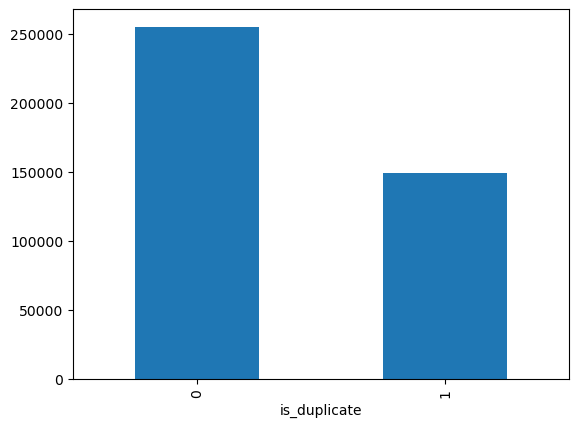

In [68]:
#distribution of duplicate and non duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

#graph shows that it is a little unbalanced i.e more 0's than 1's

In [69]:
#repeated questions

qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


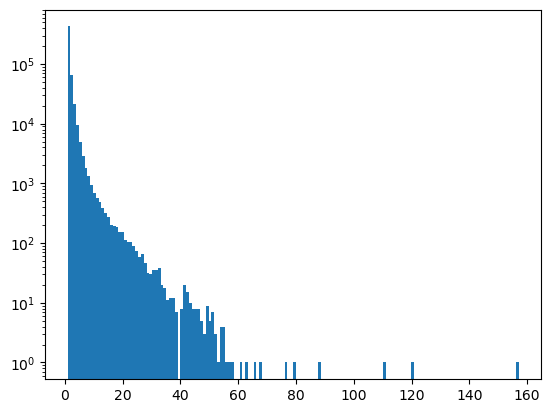

In [71]:
#repeated questions histogram-no of times a question is being repeated 

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [73]:
new_df = df.sample(30000) #taking only 30k data from 4lakh for faster execution

In [74]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [76]:
new_df.duplicated().sum()

0

In [80]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
114187,Do you think it's racist to only be attracted ...,Is it normal to find only one race of women at...
388029,What happens when a 220V appliance is plugged ...,How could I connect a 12V car appliance to hom...
296663,Do pixels of pictures decrease when uploaded o...,How do I upload folders outside of the Google ...
269635,"Is Allah, God only for Muslims?","For Muslims, is Allah everywhere and in everyt..."
146760,I want to upgrade my ram. Lenovo g400s intel c...,How is Chardonnay aged? What are some examples?


In [97]:
#BOW

from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
                        

# Split back into two arrays for question1 and question2
q1_arr = questions[:len(ques_df), :]  # First half for question1
q2_arr = questions[len(ques_df):, :]  # Second half for question2

TypeError: list indices must be integers or slices, not tuple

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape
#30000 rows as taken by us and 3000+3000=6000 columns of both ques1 and ques2

In [100]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
114187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200237,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22415,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
347727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
temp_df['is_duplicate'] = new_df['is_duplicate']


In [106]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
114187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
print(temp_df.shape)  # Should match (rows, 6001)
print(new_df['is_duplicate'].shape)  # Should match (rows,)


(30000, 6001)
(30000,)


In [112]:

X = temp_df.drop(columns=['is_duplicate'])
y = temp_df['is_duplicate']

In [118]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)  # Should match (22500, 6000)
print("y_train shape:", y_train.shape)  # Should match (22500,)
print("X_test shape:", X_test.shape)    # Should match (7500, 6000)
print("y_test shape:", y_test.shape)    # Should match (7500,)


X_train shape: (22500, 6000)
y_train shape: (22500,)
X_test shape: (7500, 6000)
y_test shape: (7500,)


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7288


In [124]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 126.1 kB/s et

In [137]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Convert DataFrame to NumPy arrays if needed
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# Initialize XGBClassifier

xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.722


#feature engineering
#q1 len
#q2 len
#q1 words
#q2 words
#words common
#words total
#words share= word common/words share

#7 new columns for every row
#3000+3000+7=6007 features